# CSCI443 Lecture 11 Notes

In this lecture we cover confidence intervals and boosting.

I used a number of slides from Lecture 9.  These demonstrated sampling distributions.

Let's start by looking at the sampling distribution for the sample mean for an underlying
exponential distribution.  Here the sample mean is itself treated like a random
variable. In these plots *n* denotes the number of samples used to generate a sample
mean.

I previously used separate plots each with a different number of samples *n* used to
compute the sample means.  In the plot I generate below I overlay several sample 
distributions with different values for *n*.  This allows us to see several trends
on a single plot.  As *n* increases, the sampling distribution for the sample mean
of the underlying exponential distribution looks more Gaussian,
and 2) the standard deviation of the sampling distribution diminishes resulting
in a steeper peak to the probability density function.

Although I only showed the sampling distributions for the sample means of
uniform and exponential distributions, the trend toward a Gaussian sampling 
distribution for the sample mean occurs with a wirde array of underlying
distributions due to the Central Limit Theorem.  We can view the sample mean
as a sum of random variables divided by the number of random variables in the
sample mdean.  According to the Central Limit, any sum of independent
random variables with finite mean and finite variance will become Gaussian
in the limit as *n* approaches infinity.


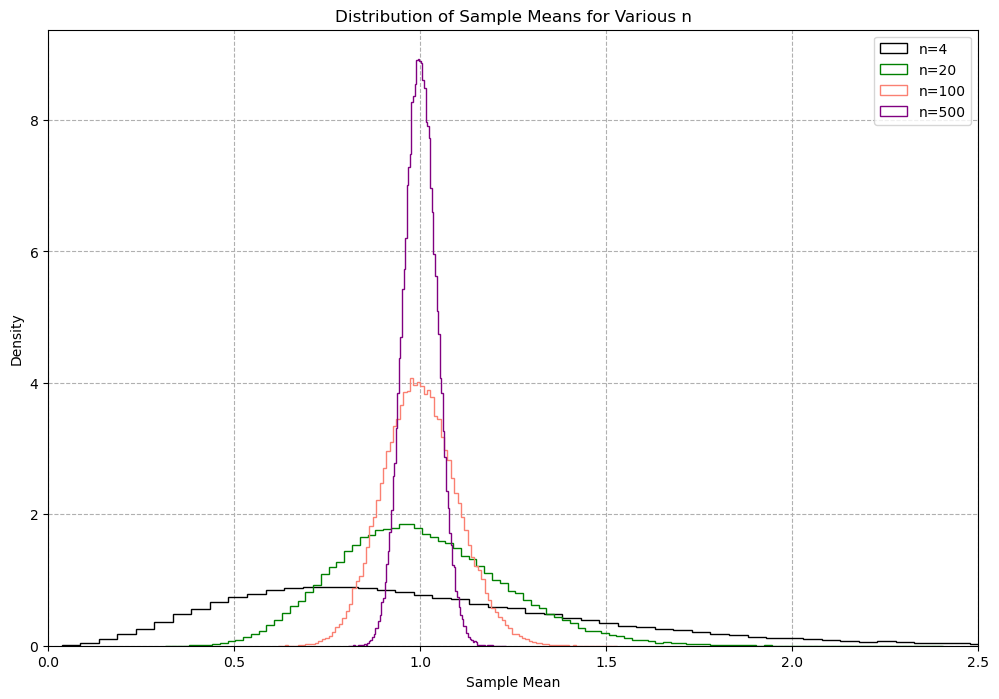

In [343]:
# Parameters for generating sample means
m = 100000  # Number of sample means to compute for each n
n_values = [4, 20, 100, 500]  # Different sample sizes to explore
lambda_param = 1.0  # Lambda parameter for the exponential distribution

plt.figure(figsize=(12, 8))

# Colors for different histograms
colors = ['black', 'green', 'salmon', 'purple']

for i, n in enumerate(n_values):
    sample_means = [np.mean(np.random.exponential(scale=1/lambda_param, size=n)) for _ in range(m)]
    plt.hist(sample_means, bins=int(m/1000), label=f'n={n}', color=colors[i], density=True, histtype="step")

plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Distribution of Sample Means for Various n')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.xlim(0, 2.5)
plt.show()


## Standard deviation of sample means with increasing n

As the number of samples *n* included in the computation of the sample mean
increases, the sample mean dimishes.  It so happens that the standard
deviation of the sample mean dimishes according to

$$\text{SE } = \frac{sigma}{\sqrt{n}}$$

Let *m* be the number of sample means generated to compute the standard
deviation of the sample mean distribution.  Each sample mean is computed
using *n* samples.

The number of sample means used in each computation of the standard deviation
of the sample means is relatively small at $m=20$ to show some variation in 
the standard deviation of the sample means sampling distribution.  As $m$
increases the standard deviation of the sample mean sampling distribuiton
more closely approximates $\sigma/\sqrt{n}$.  That has been shown on 
previously plots as we increased $m$ while holding $n$ constant.


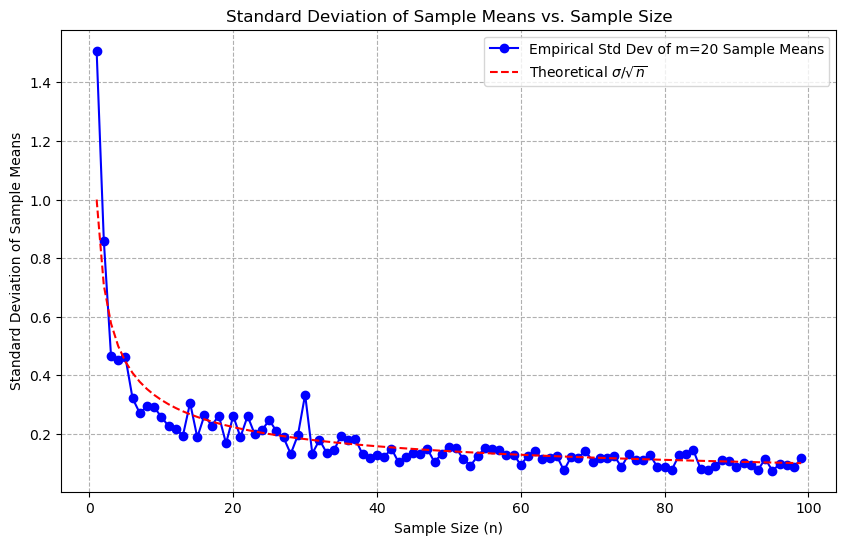

In [344]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the demonstration
lambda_param = 1.0  # Lambda parameter for the exponential distribution
m = 20  # Number of sample means to compute for each n
n_values = range(1, 100)
#n_values = [1, 2, 3, 5, 7, 10, 20, 30, 50, 70, 100]  # Different sample sizes to explore

# Store the standard deviations of the sample means for each n
std_devs_of_sample_means = []

# Generate the sample means and compute their standard deviations for each n
for n in n_values:
    sample_means = [np.mean(np.random.exponential(scale=1/lambda_param, size=n)) for _ in range(m)]
    std_devs_of_sample_means.append(np.std(sample_means))



# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, std_devs_of_sample_means, marker='o', linestyle='-', color='blue', 
         label=f'Empirical Std Dev of m={m} Sample Means')

#n_values_lin = np.linspace(1, 100, 100)  # From 1 to 1000, with 500 points

# Calculating 1/sqrt(n) for these n values
y_values = 1 / np.sqrt(n_values)

plt.plot(n_values, y_values, linestyle='--', color='red', 
         label='Theoretical $\sigma / \sqrt{n}$')

plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Deviation of Sample Means')
plt.title('Standard Deviation of Sample Means vs. Sample Size')
plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()


## Confidence Intervals


A confidence interval specifies a range of values which is likely to contain the 
true value of a population parameter, based on the sample statistic and the 
level of confidence chosen.

Slightly more formally, a p% confidence interval means that if we were to take many
sample sets from the population and construct a confidence interval from each sample
set in the same way, p% of those intervals would contain the true population parameter. 

We now consider the case where the population follows a uniform distribution, and
we are measuring the sample mean. A uniform distribution is symmetric, meaning it
has zero skew. As such, the sampling distribution of the sample mean begins to
resemble a bell curve, even for very small sample sizes (n). Even at 
n=3, the distribution starts to take on a bell-like shape, and as 
n increases towards infinity, this bell curve more closely approximates a 
Gaussian distribution, in accordance with the Central Limit Theorem.


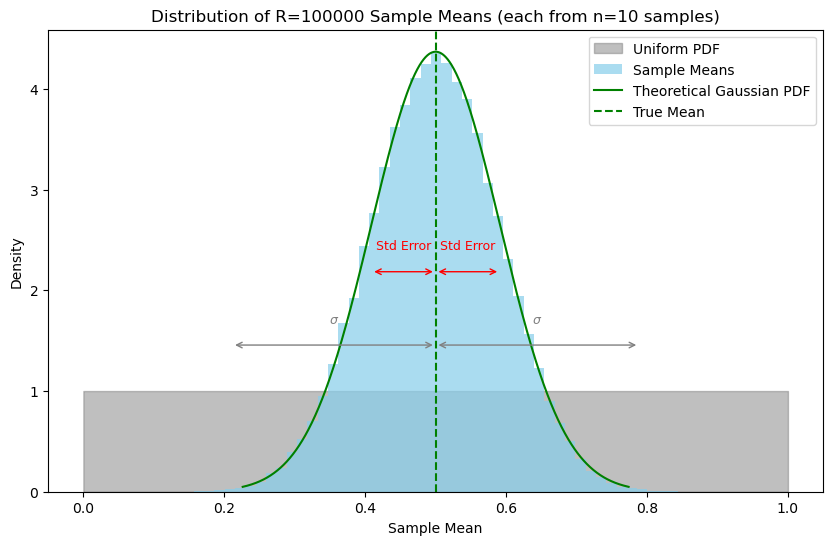

In [345]:
def plot_uniform_sample_means(n, R, seed = None):
    np.random.seed(seed)  # Set the seed for reproducibility, if provided

    # Parameters for the uniform distribution
    a, b = 0, 1  # min and max
    
    # Generate R sample means from n samples each
    sample_means = [np.mean(np.random.uniform(a, b, n)) for _ in range(R)]
    
    # Uniform distribution's mean and variance
    mean_uniform = (a + b) / 2
    var_uniform = (b - a) ** 2 / 12
    std_dev_uniform = np.sqrt(var_uniform)
    
    # Theoretical Gaussian for the sampling distribution of the mean
    mean_theoretical_gaussian = mean_uniform
    std_error = std_dev_uniform / np.sqrt(n)  # Standard error of the mean
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Shaded PDF of the uniform distribution
    x_uniform = np.linspace(a, b, 1000)
    pdf_uniform = uniform.pdf(x_uniform, loc=a, scale=b-a)
    plt.fill_between(x_uniform, pdf_uniform, color='gray', alpha=0.5, label='Uniform PDF')
    
    # Histogram of sample means
    plt.hist(sample_means, bins=50, density=True, alpha=0.7, color='skyblue', label=f'Sample Means')
    
    # Overlay the theoretical Gaussian PDF
    x_gaussian = np.linspace(mean_uniform - 3*std_error, mean_uniform + 3*std_error, 1000)
    pdf_gaussian = norm.pdf(x_gaussian, mean_theoretical_gaussian, std_error)
    plt.plot(x_gaussian, pdf_gaussian, 'g-', label='Theoretical Gaussian PDF')
    
    # Add a vertical line for the mean of the uniform distribution
    plt.axvline(mean_uniform, color='green', linestyle='--', label='True Mean')
    
    # Determine y position for the arrow based on the max value of the Gaussian PDF
    y_position_for_arrow = np.max(pdf_gaussian) / 2  # Adjust this value as needed
    
    # Add a double-ended arrow for the standard error higher up on the plot
    plt.annotate('', xy=(mean_uniform - std_error, y_position_for_arrow), 
                 xytext=(mean_uniform, y_position_for_arrow),
                 arrowprops=dict(arrowstyle="<->", color='red'))
    plt.annotate('', xy=(mean_uniform, y_position_for_arrow), 
                 xytext=(mean_uniform + std_error, y_position_for_arrow),
                 arrowprops=dict(arrowstyle="<->", color='red'))

    plt.text(mean_uniform - std_error/2, y_position_for_arrow + np.max(pdf_gaussian) * 0.05, 'Std Error', 
             horizontalalignment='center', color='red', fontsize=9)
    plt.text(mean_uniform + std_error/2, y_position_for_arrow + np.max(pdf_gaussian) * 0.05, 'Std Error', 
             horizontalalignment='center', color='red', fontsize=9)


    # Add a double-ended arrow for the distribution standard deviation lower on the plot
    y_position_for_arrow = np.max(pdf_gaussian) / 3  # Adjust this value as needed

    plt.annotate('', xy=(mean_uniform - std_dev_uniform, y_position_for_arrow), 
                 xytext=(mean_uniform, y_position_for_arrow),
                 arrowprops=dict(arrowstyle="<->", color='gray'))
    plt.annotate('', xy=(mean_uniform, y_position_for_arrow), 
                 xytext=(mean_uniform + std_dev_uniform, y_position_for_arrow),
                 arrowprops=dict(arrowstyle="<->", color='gray'))

    plt.text(mean_uniform - std_dev_uniform / 2, 
             y_position_for_arrow + np.max(pdf_gaussian) * 0.05, '$\sigma$', 
             horizontalalignment='center', color='gray', fontsize=9)
    plt.text(mean_uniform + std_dev_uniform / 2, 
             y_position_for_arrow + np.max(pdf_gaussian) * 0.05, '$\sigma$', 
             horizontalalignment='center', color='gray', fontsize=9)

    # Final touches to the plot
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.title(f'Distribution of R={R} Sample Means (each from n={n} samples)')
    plt.legend()

    output_file=f'uniform_sample_means_n{n}_R{R}_seed{seed}.png'
    
    # Saving the plot to a file
    plt.savefig(output_file)

    # Displaying the plot in the Jupyter notebook
    plt.show()

# Example usage of the function
plot_uniform_sample_means(n=10, R=100000)


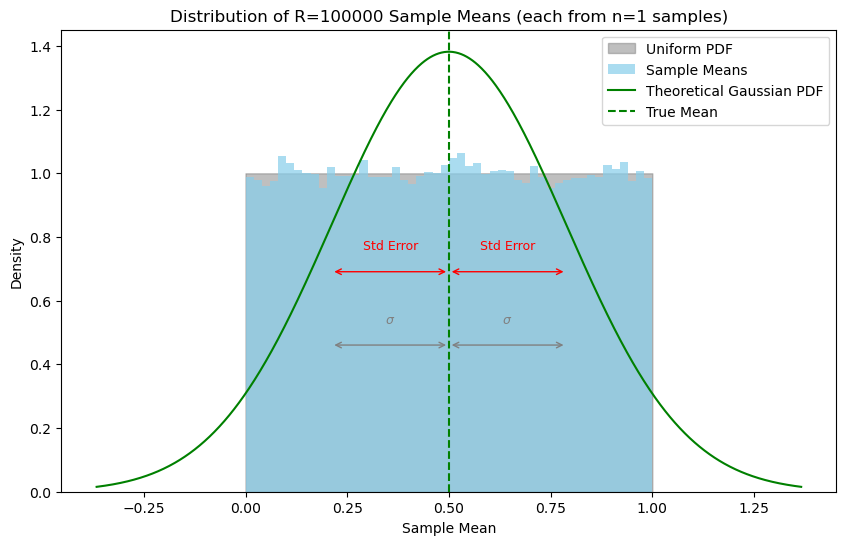

In [346]:
plot_uniform_sample_means(n=1, R=100000)


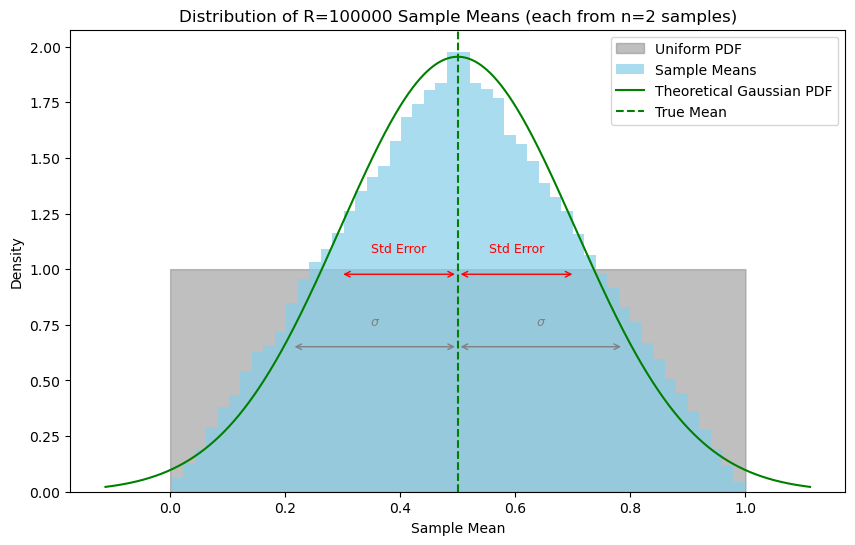

In [347]:
plot_uniform_sample_means(n=2, R=100000)


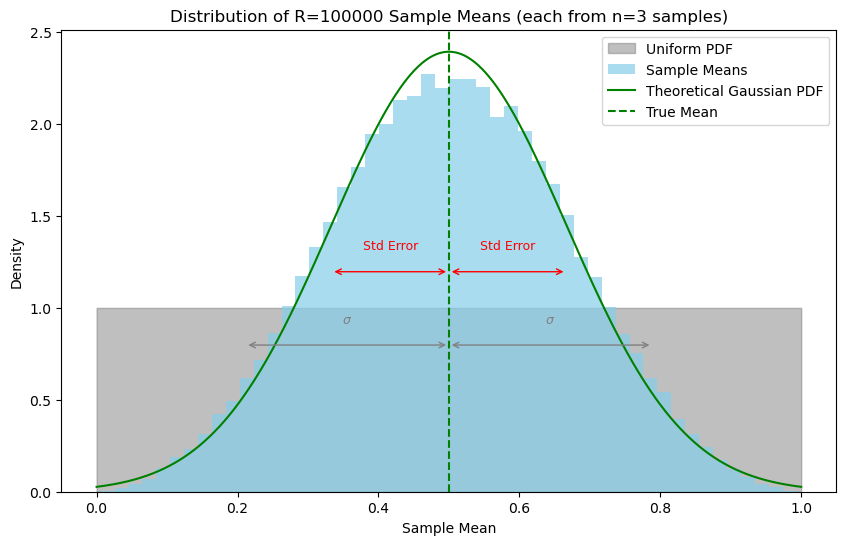

In [348]:
plot_uniform_sample_means(n=3, R=100000)


## Interval containing p% of the sample means

When the population mean (μ) and standard deviation (σ) are known, and the
sampling distribution of the sample mean approximates a Gaussian distribution,
then approximately 95% of the sample means will fall within 
1.96⋅SE of the population mean, where SE=σ/n.  According to the Central
Limit Theorem, as n increases, the sampling distribution of the sample mean
for any distribution with a finite mean and finite variance approaches a
Gaussian distribution.

This area containing 95% of the sample means for a Gaussian sampling
distribution is demonstrated in the next two plots.

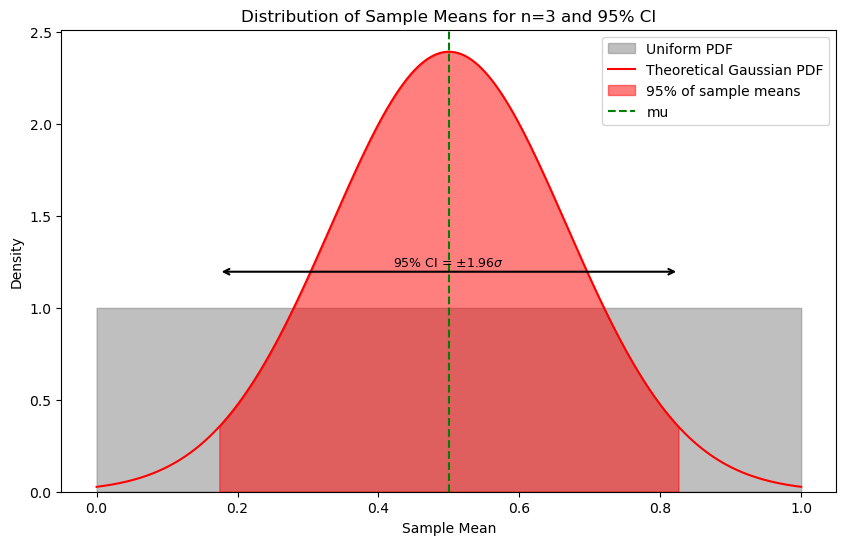

In [378]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm

def plot_uniform_sample_means_with_95_arrows(n):
    # Parameters for U[0, 1]
    a, b = 0, 1
    mu = (a + b) / 2
    sigma = (b - a) / np.sqrt(12)
    
    # Theoretical Gaussian for the sampling distribution of the mean
    std_error = sigma / np.sqrt(n)
    mean_sample_means = mu
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Shaded PDF of the uniform distribution as the background
    x_uniform = np.linspace(a, b, 1000)
    pdf_uniform = uniform.pdf(x_uniform, loc=a, scale=b-a)
    plt.fill_between(x_uniform, pdf_uniform, color='gray', alpha=0.5, label='Uniform PDF')
    
    # Theoretical Gaussian PDF with shaded CI area
    x_gaussian = np.linspace(mu - 3*std_error, mu + 3*std_error, 1000)
    y_gaussian = norm.pdf(x_gaussian, mu, std_error)
    plt.plot(x_gaussian, y_gaussian, 'r-', label='Theoretical Gaussian PDF')
    ci_left, ci_right = mu - 1.96 * std_error, mu + 1.96 * std_error
    plt.fill_between(x_gaussian, y_gaussian, where=(x_gaussian >= ci_left) & (x_gaussian <= ci_right), 
                     color='red', alpha=0.5, label='95% of sample means')
    
    # Histogram of sample means
    #plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='skyblue', label='Sample Means')
    
    # Add a vertical line for the mean of the sample means
    plt.axvline(mu, color='green', linestyle='--', label='mu')
    
    # Add double-ended arrows for the 95% CI around the mean of sample means
    plt.annotate('', xy=(ci_left, max(y_gaussian) / 2), xytext=(ci_right, max(y_gaussian) / 2),
                 arrowprops=dict(arrowstyle="<->", lw=1.5, color='black'))
    plt.text(mu, max(y_gaussian) / 2 + 0.03, '95% CI = $\pm 1.6\sigma$', horizontalalignment='center', color='black', fontsize=9)

    plt.ylim(bottom=0)
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.title(f'Distribution of Sample Means for n={n} and 95% CI')
    plt.legend()

    output_file=f'uniform_sample_means_95_n{n}.png'
    
    # Saving the plot to a file
    plt.savefig(output_file)

    
    plt.show()

# Example usage of the function
plot_uniform_sample_means_with_95_arrows(n=3)


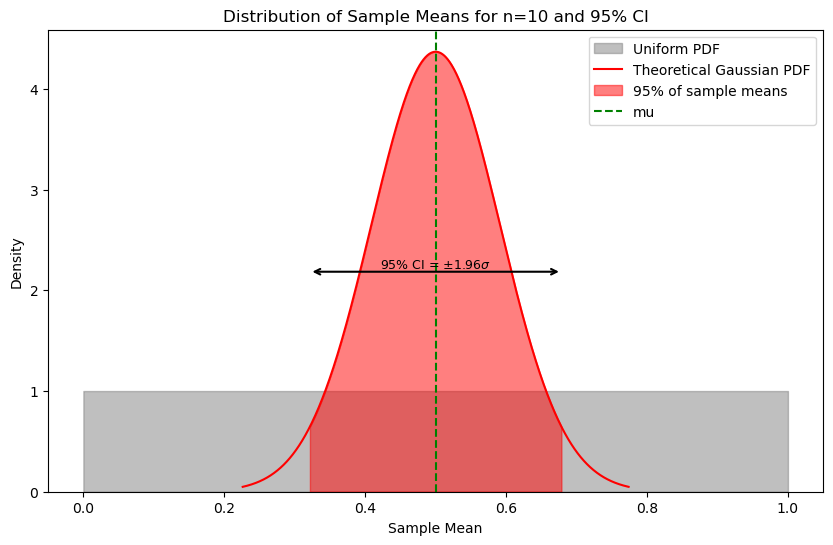

In [379]:
plot_uniform_sample_means_with_95_arrows(n=10)


samples=[0.67573142 0.04471218]
sample_mean=0.3602217988532492
ci_left, ci_right = -0.258177049781345, 0.9786206474878434


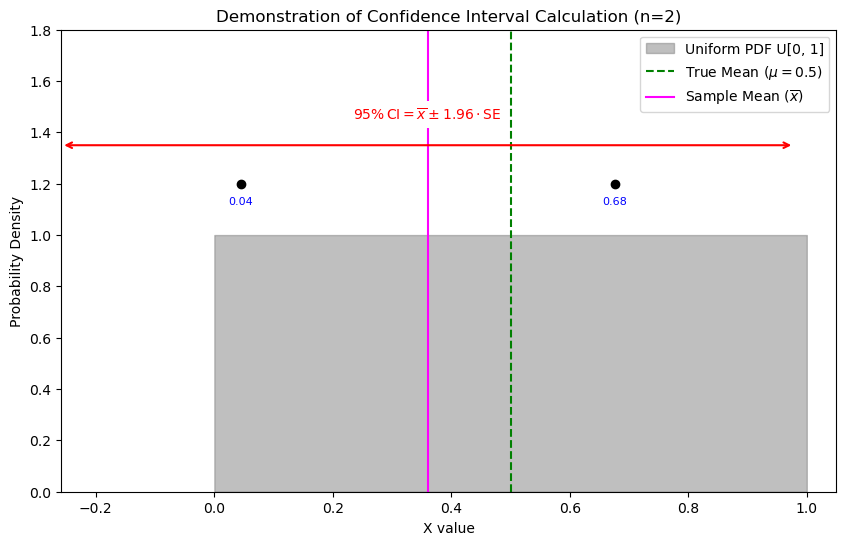

In [376]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

def plot_uniform_samples_with_ci(num_samples, annotate_samples=False, seed=None):
    np.random.seed(seed)
    
    a, b = 0, 1  # Parameters for U[0, 1]
    mu = (a + b) / 2  # True mean
    sigma = (b - a) / np.sqrt(12)  # Population standard deviation
    
    # Generate num_samples samples from U[0, 1]
    samples = np.random.uniform(a, b, num_samples)
    print(f"samples={samples}")
    sample_mean = np.mean(samples)
    print(f"sample_mean={sample_mean}")
    std_dev = np.std(samples,ddof=1)
    std_error = std_dev / np.sqrt(num_samples)  # Standard error of the mean
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Uniform PDF shaded in gray
    x = np.linspace(a, b, 1000)
    y = uniform.pdf(x, loc=a, scale=b-a)
    plt.fill_between(x, y, color='gray', alpha=0.5, label='Uniform PDF U[0, 1]')
    
    # Vertical line at the true mean
    plt.axvline(mu, color='green', linestyle='--', label='True Mean ($\mu = 0.5$)')
    
    # Samples along the "sample line"
    sample_line_y = np.max(y) + 0.2  # Slightly above the PDF
    plt.scatter(samples, [sample_line_y]*num_samples, color='black', zorder=5)
    
    # Optional annotation of sample values
    if annotate_samples:
        for x, y in zip(samples, [sample_line_y]*num_samples):
            plt.text(x, y - 0.05, f'{x:.2f}', ha='center', va='top', fontsize=8, color='blue')
    
    # Vertical line at the sample mean in magenta
    plt.axvline(sample_mean, color='magenta', linestyle='-', label='Sample Mean ($\overline{x}$)')
    
    # Double-ended arrows for the CI in red
    ci_left, ci_right = sample_mean - 1.96 * std_error, sample_mean + 1.96 * std_error
    plt.annotate('', xy=(ci_left, sample_line_y + 0.15), xytext=(ci_right, sample_line_y + 0.15),
                 arrowprops=dict(arrowstyle="<->", lw=1.5, color='red'))
    print(f"ci_left, ci_right = {ci_left}, {ci_right}")
    
    # Annotation for the CI with a white bbox
    ci_annotation = r"$95\% \, \text{CI} = \overline{x} \pm 1.96 \cdot \text{SE}$"
    plt.text(sample_mean, sample_line_y + 0.25, ci_annotation, horizontalalignment='center', color='red',
             bbox=dict(facecolor='white', alpha=1, edgecolor='none'))
    
    # Adjusting ylim to provide space for the legend and annotations
    plt.ylim(bottom=0, top=1.8)
    
    plt.xlabel('X value')
    plt.ylabel('Probability Density')
    plt.title(f'Demonstration of Confidence Interval Calculation (n={num_samples})')
    plt.legend(loc='upper right')
    plt.xlim(min(ci_left, a-0.05), max(ci_right, b+0.05))

    output_file = f'uniform_samples_with_ci_n{n}_seed{seed}.png'
    plt.savefig(output_file)

    plt.show()

# Example usage of the function
plot_uniform_samples_with_ci(num_samples=2, seed=51, annotate_samples=True)


In [372]:
samples = np.array([0.04, 0.68])
num_samples = len(samples)
sample_mean = np.mean(samples)
std_dev = np.std(samples,ddof=1)
std_error = std_dev / np.sqrt(num_samples)  # Standard error of the mean
ci_left, ci_right = sample_mean - 1.96 * std_error, sample_mean + 1.96 * std_error
print(f"mean: {sample_mean}")
print(f"stddev: {std_dev}")
print(f"SE: {std_error}")
print(f"ci_left, ci_right = {ci_left}, {ci_right}")


mean: 0.36000000000000004
stddev: 0.4525483399593905
SE: 0.32
ci_left, ci_right = -0.26719999999999994, 0.9872000000000001


$\overline{x} = \frac{0.04+ 0.68}{2} = 0.36$

$s_x = \frac{1}{n-1} \bigg(\sum_{i=1}^{n} x_i^2 - n\cdot \overline{x^2}\bigg) \approx 0.45$

$\text{SE } = \frac{s_x}{\sqrt{n}} = \frac{0.45}{\sqrt{2}} \approx 0.32$

$CI = \overline{x} \pm 1.96 \cdot \text{SE} \approx 0.36 \pm 1.96 \cdot 0.32 \approx [-0.27, 0.98]$

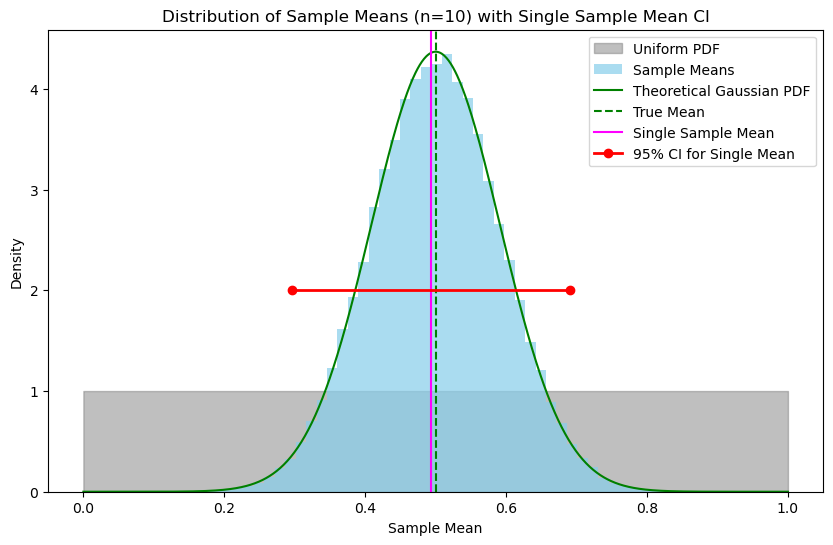

In [351]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# from scipy.stats import expon, norm

def plot_uniform_sample_means_with_single_ci(n, R, seed=None):
    np.random.seed(seed)  # Set the seed for reproducibility, if provided
    
    output_file = f'uniform_means_with_single_ci_n{n}_R{R}_seed{seed}.png'
    
    # Parameters for the uniform distribution
    a, b = 0, 1  # min and max
    
    # Generate R sample means from n samples each
    sample_means = [np.mean(np.random.uniform(a, b, n)) for _ in range(R)]
    
    # Generate a single sample of size n, calculate its mean and 95% confidence interval
    single_sample = np.random.uniform(a, b, n)
    single_sample_mean = np.mean(single_sample)
    single_sem = np.std(single_sample, ddof=1) / np.sqrt(n)  # Standard error of the mean
    ci_low, ci_high = stats.norm.interval(0.95, loc=single_sample_mean, scale=single_sem)
    
    # Uniform distribution's mean and variance
    mean_uniform = (a + b) / 2
    var_uniform = (b - a) ** 2 / 12
    std_dev_uniform = np.sqrt(var_uniform)
    
    # Theoretical Gaussian for the sampling distribution of the mean
    mean_theoretical_gaussian = mean_uniform
    std_error = std_dev_uniform / np.sqrt(n)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Shaded PDF of the uniform distribution
    x_uniform = np.linspace(a, b, 1000)
    pdf_uniform = uniform.pdf(x_uniform, loc=a, scale=b-a)
    plt.fill_between(x_uniform, pdf_uniform, color='gray', alpha=0.5, label='Uniform PDF')
    
    # Histogram of sample means
    plt.hist(sample_means, bins=50, density=True, alpha=0.7, color='skyblue', label='Sample Means')
    
    # Overlay the theoretical Gaussian PDF
    x_gaussian = np.linspace(a, b, 1000)
    pdf_gaussian = norm.pdf(x_gaussian, mean_theoretical_gaussian, std_error)
    plt.plot(x_gaussian, pdf_gaussian, 'g-', label='Theoretical Gaussian PDF')
    
    # Add a vertical line for the mean of the uniform distribution
    plt.axvline(mean_uniform, color='green', linestyle='--', label='True Mean')
    
    # Add the single sample mean and its confidence interval
    plt.axvline(single_sample_mean, color='magenta', linestyle='-', label='Single Sample Mean')
    plt.plot([ci_low, ci_high], [2, 2], color='red', marker='o', linestyle='-', linewidth=2, label='95% CI for Single Mean')
    
    # Final touches to the plot
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.title(f'Distribution of Sample Means (n={n}) with Single Sample Mean CI')
    plt.legend(loc='upper right')
    
    # Saving the plot to a file
    plt.savefig(output_file)
    
    # Displaying the plot in the Jupyter notebook
    plt.show()

# Example usage of the function with different seeds, n, and R values
plot_uniform_sample_means_with_single_ci(n=10, R=100000, seed=42)


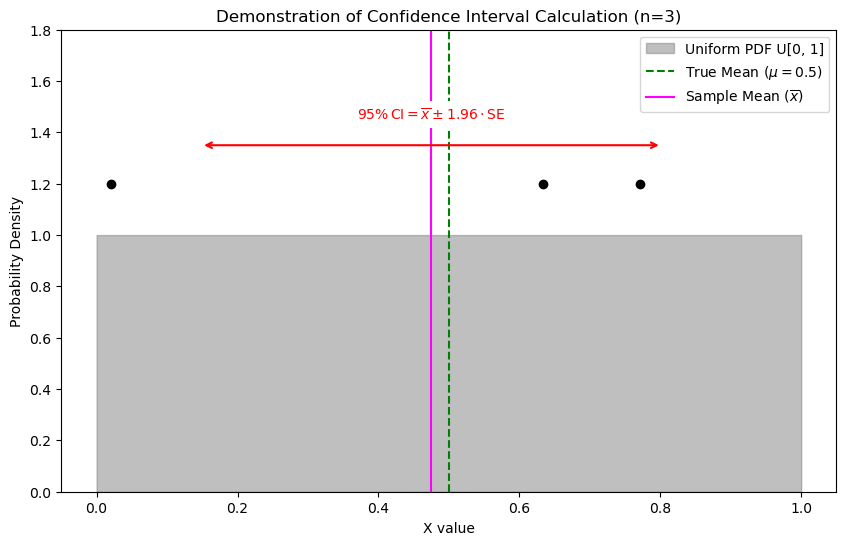

In [353]:
plot_uniform_samples_with_ci(num_samples=3, seed=10)


In the figure above, 

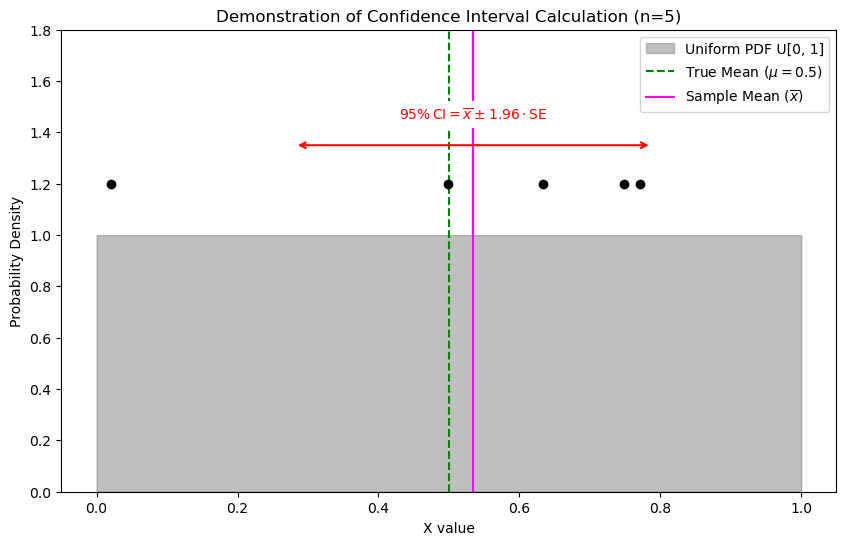

In [354]:
plot_uniform_samples_with_ci(num_samples=5, seed=10)


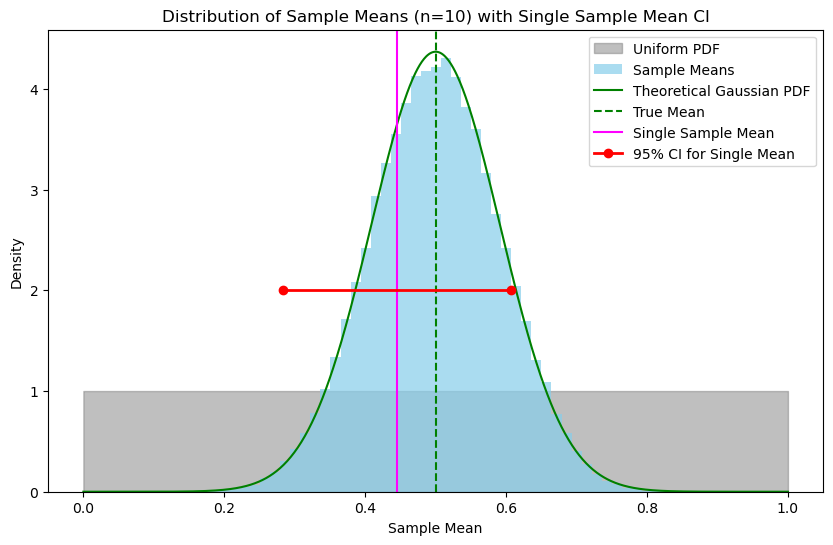

In [355]:
plot_uniform_sample_means_with_single_ci(n=10, R=100000, seed=21)


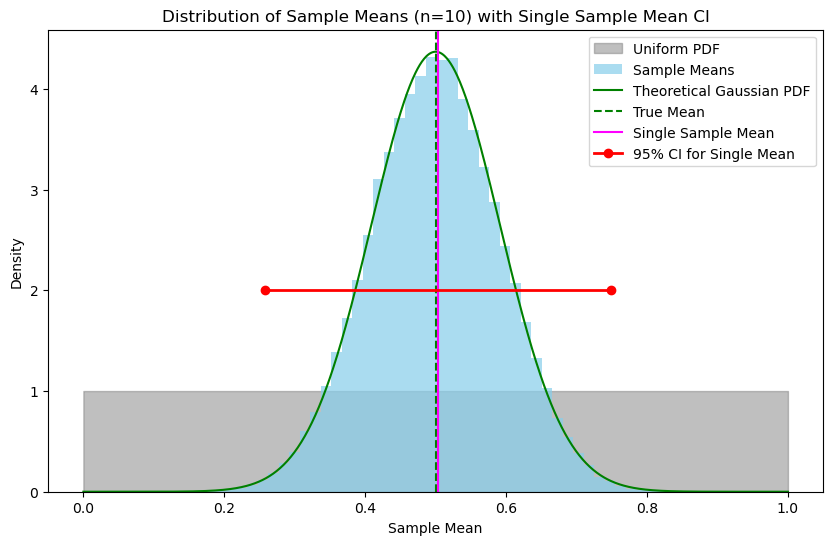

In [356]:
plot_uniform_sample_means_with_single_ci(n=10, R=100000, seed=97)


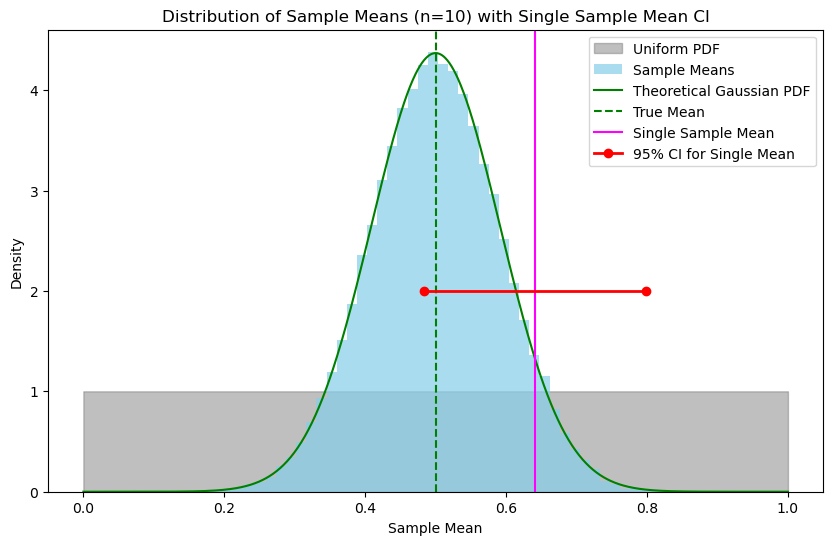

In [357]:
plot_uniform_sample_means_with_single_ci(n=10, R=100000, seed=26)


# Bootstrapping

To demonstrate bootstrapping, we start with an "original sample" of size n.  We then create a boost sample by drawing n samples with replacement from the original sample.  We repeat this a number of times to show how replacement allows individual samples to appear more than once in the boost sample.

In [358]:
# Python code to generate a sample of size n and then print k bootstrap samples of size n

import numpy as np

# Parameters
n = 6  # Size of the original sample and each bootstrap sample
k = 10  # Number of bootstrap samples to generate

# Generating a sample of size n from a uniform distribution (for demonstration purposes)
original_sample = np.random.randint(low=0, high=9, size=n*2)
print("Original Sample:")
print(original_sample)

# Generating and printing k bootstrap samples of size n
print("\nBootstrap Samples:")
for i in range(k):
    bootstrap_sample = np.random.choice(original_sample, size=n, replace=True)
    print(f"Bootstrap Sample {i}: {bootstrap_sample}")


Original Sample:
[6 7 6 1 0 1 1 1 3 7 1 7]

Bootstrap Samples:
Bootstrap Sample 0: [1 0 1 7 1 7]
Bootstrap Sample 1: [1 7 0 6 1 1]
Bootstrap Sample 2: [3 6 1 1 1 7]
Bootstrap Sample 3: [1 3 1 1 0 0]
Bootstrap Sample 4: [7 7 7 7 6 7]
Bootstrap Sample 5: [7 1 1 7 6 7]
Bootstrap Sample 6: [6 6 1 1 3 7]
Bootstrap Sample 7: [6 7 1 0 1 1]
Bootstrap Sample 8: [7 0 1 1 1 7]
Bootstrap Sample 9: [1 7 1 7 7 1]


In [359]:
import numpy as np

# Parameters
n = 5  # Size of the original sample and each bootstrap sample
k = 10  # Number of bootstrap samples to generate

# Generating a sample of size n from a uniform distribution (for demonstration purposes)
original_sample = np.random.exponential(scale=1/lambda_param, size=n)
print("Original Sample:")
print(original_sample)

# Generating and printing k bootstrap samples of size n
print("\nBootstrap Samples:")
for i in range(k):
    bootstrap_sample = np.random.choice(original_sample, size=n, replace=True)
    print(f"Bootstrap Sample {i}: {bootstrap_sample}")


Original Sample:
[1.06647575 0.20752899 1.05458134 0.34659841 0.72641188]

Bootstrap Samples:
Bootstrap Sample 0: [1.05458134 1.05458134 1.05458134 1.05458134 0.20752899]
Bootstrap Sample 1: [1.06647575 0.20752899 1.05458134 0.72641188 0.20752899]
Bootstrap Sample 2: [1.05458134 0.34659841 1.06647575 0.34659841 0.72641188]
Bootstrap Sample 3: [0.34659841 0.72641188 0.34659841 1.05458134 0.20752899]
Bootstrap Sample 4: [0.72641188 1.06647575 0.20752899 0.34659841 1.05458134]
Bootstrap Sample 5: [1.05458134 1.06647575 0.72641188 1.06647575 1.05458134]
Bootstrap Sample 6: [0.72641188 0.34659841 1.06647575 1.05458134 0.72641188]
Bootstrap Sample 7: [0.34659841 0.72641188 1.06647575 1.05458134 1.05458134]
Bootstrap Sample 8: [0.72641188 1.05458134 0.34659841 0.34659841 0.20752899]
Bootstrap Sample 9: [0.72641188 1.05458134 1.06647575 1.05458134 1.05458134]


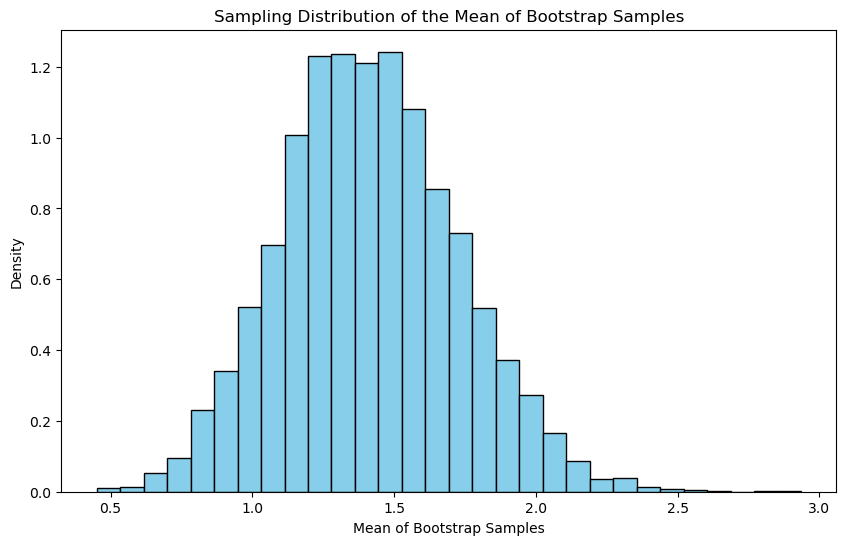

In [360]:
# Generating and plotting the sampling distribution of the mean of bootstrap samples
# Drawn from n=20 samples of an exponential distribution with lambda = 1

n = 20  # Size of the original sample
k = 10000  # Number of bootstrap samples to generate for a good approximation
lambda_param = 1.0  # Lambda parameter for the exponential distribution

# Generating an original sample of size n from an exponential distribution
original_sample = np.random.exponential(scale=1/lambda_param, size=n)

# Array to store the means of the bootstrap samples
bootstrap_means = np.zeros(k)

# Generating k bootstrap samples and calculating their means
for i in range(k):
    bootstrap_sample = np.random.choice(original_sample, size=n, replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Plotting the distribution of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Mean of Bootstrap Samples')
plt.ylabel('Density')
plt.title('Sampling Distribution of the Mean of Bootstrap Samples')
plt.show()


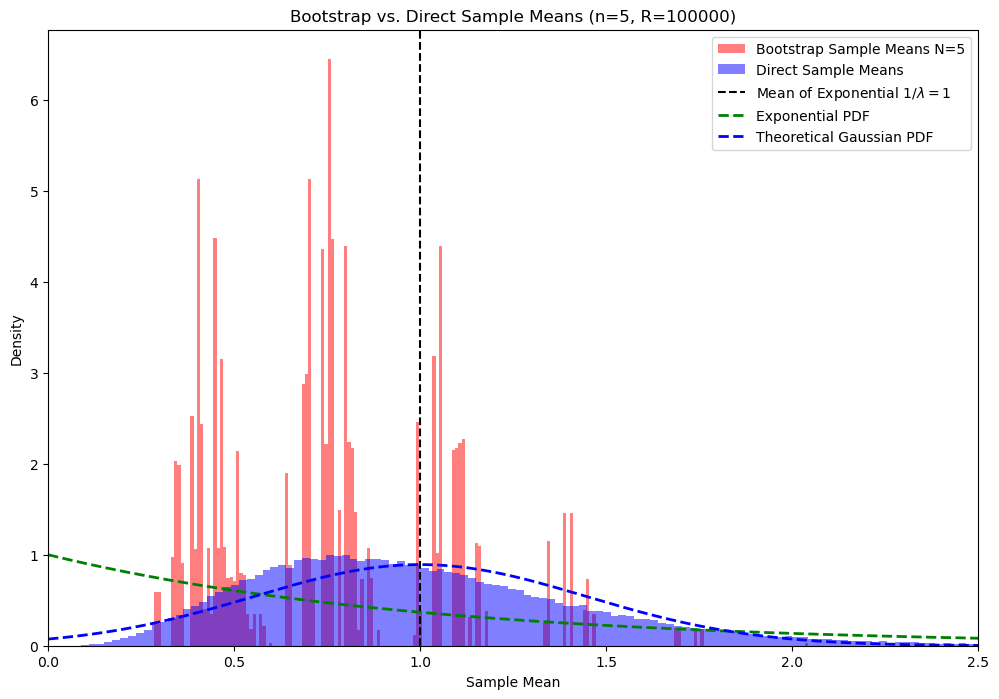

In [361]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm
np.random.seed(33)

def plot_bootstrap_and_direct_means(n, R, N, bins=200):
    lambda_param = 1.0  # Lambda parameter for the exponential distribution
    
    # Generate an original sample of size N
    original_sample = np.random.exponential(scale=1/lambda_param, size=N)
    
    # Bootstrap R samples and compute their means
    bootstrap_means = [np.mean(np.random.choice(original_sample, size=n, replace=True)) for _ in range(R)]
    
    # Generate R direct sample means from the exponential distribution
    direct_sample_means = [np.mean(np.random.exponential(scale=1/lambda_param, size=n)) for _ in range(R)]
    
    # Theoretical Gaussian distribution parameters
    mean_theoretical = 1/lambda_param
    std_error = mean_theoretical / np.sqrt(n)  # Standard error
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.hist(bootstrap_means, bins=bins, alpha=0.5, color='red', 
             density=True, label=f'Bootstrap Sample Means N={N}')
    plt.hist(direct_sample_means, bins=bins, alpha=0.5, color='blue', density=True, label='Direct Sample Means')
    
    # Vertical line at 1/lambda
    plt.axvline(x=mean_theoretical, color='k', linestyle='--', label='Mean of Exponential $1/\\lambda=1$')
    
    # Exponential PDF
    x_values = np.linspace(0, 3, 1000)
    pdf_exponential = expon.pdf(x_values, scale=1/lambda_param)
    plt.plot(x_values, pdf_exponential, 'g--', linewidth=2, label='Exponential PDF')
    
    # Theoretical Gaussian PDF
    pdf_gaussian = norm.pdf(x_values, mean_theoretical, std_error)
    plt.plot(x_values, pdf_gaussian, 'b--', linewidth=2, label='Theoretical Gaussian PDF')
    
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.title(f'Bootstrap vs. Direct Sample Means (n={n}, R={R})')
    plt.legend()
    plt.xlim(0, 2.5)

    plt.savefig(f'bootstrap_vs_direct_n={n}_R={R}_N={N}.png')  # Saves the plot as a PNG file

    plt.show()

# Example usage
plot_bootstrap_and_direct_means(n=5, R=100000, N=5)



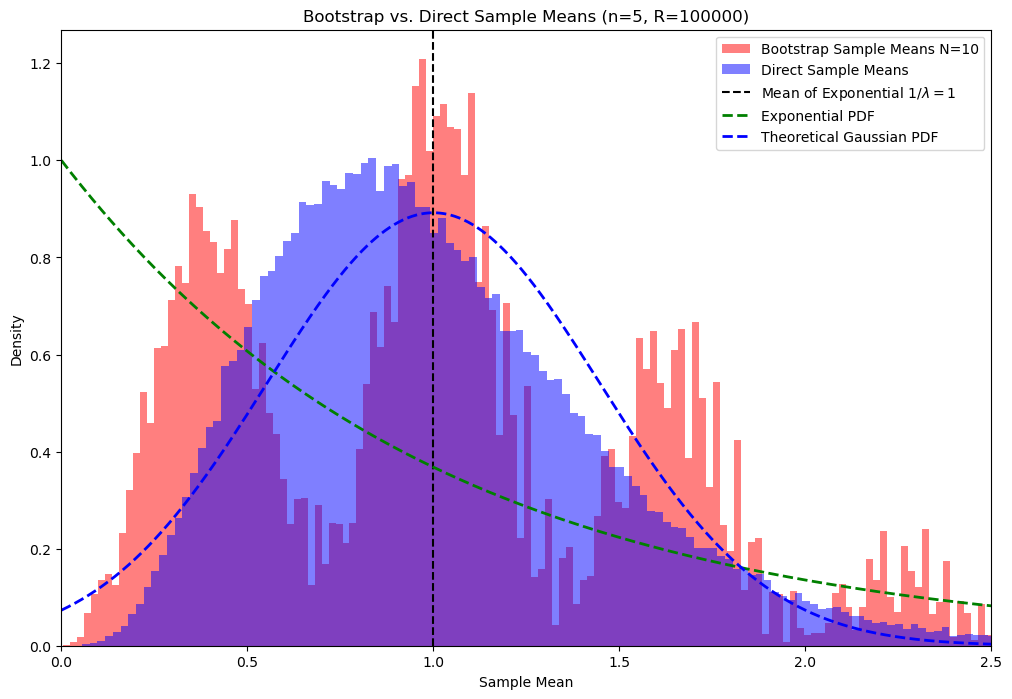

In [362]:
plot_bootstrap_and_direct_means(n=5, R=100000, N=10)


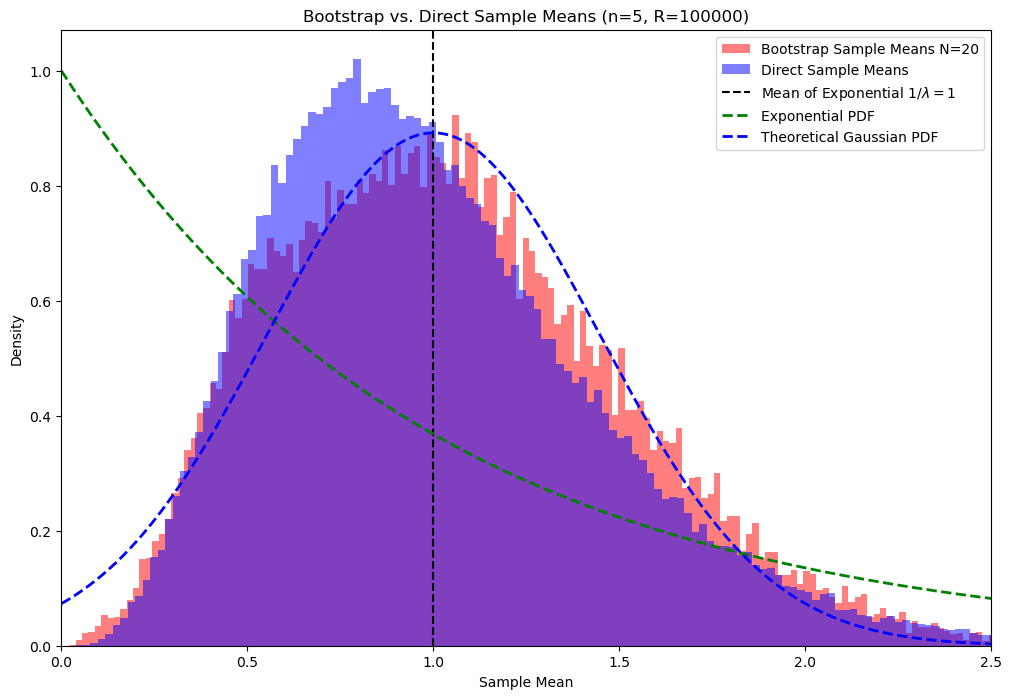

In [363]:
plot_bootstrap_and_direct_means(n=5, R=100000, N=20)


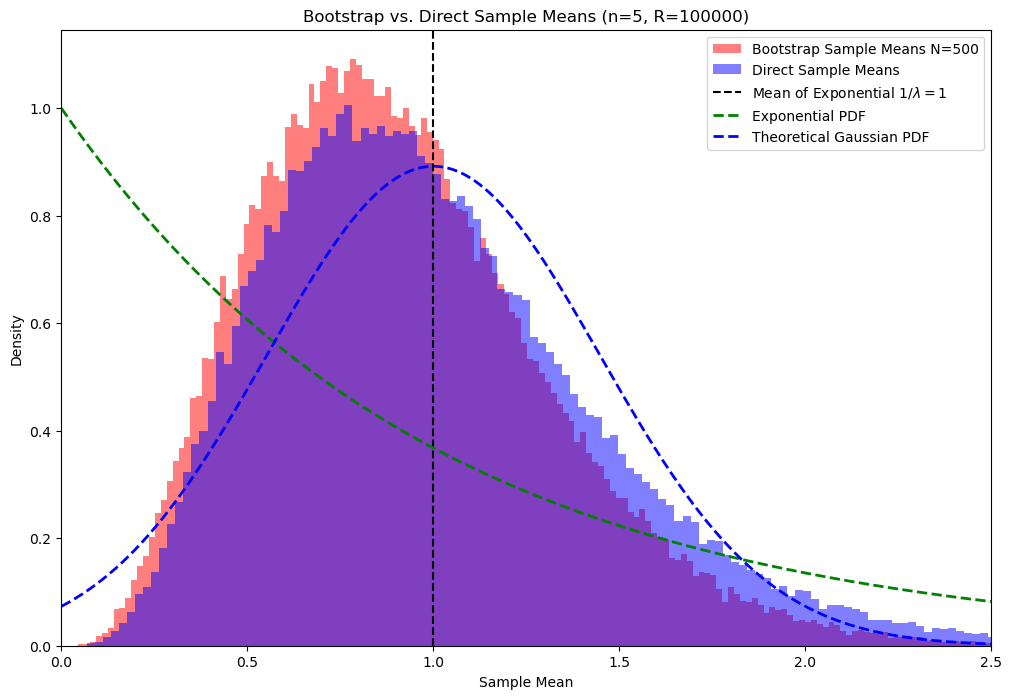

In [364]:
plot_bootstrap_and_direct_means(n=5, R=100000, N=500)


In [365]:
from glob import glob

print("Generated files:")
fnames = glob("*.png")
for f in fnames:
    print(f)

Generated files:
uniform_sample_means_95_n10.png
uniform_sample_means_n10_R100000_seedNone.png
uniform_sample_means_n1_R100000_seedNone.png
bootstrap_vs_direct_n=5_R=100000_N=20.png
uniform_samples_with_ci_n99_seed10.png
bootstrap_vs_direct_n=5_R=100000_N=10.png
uniform_means_with_single_ci_n10_R100000_seed21.png
uniform_sample_means_n2_R100000_seedNone.png
uniform_means_with_single_ci_n10_R100000_seed26.png
uniform_sample_means_95_n3.png
bootstrap_vs_direct_n=5_R=100000_N=500.png
uniform_means_with_single_ci_n10_R100000_seed97.png
bootstrap_vs_direct_n=5_R=100000_N=5.png
uniform_means_with_single_ci_n10_R100000_seed42.png
uniform_sample_means_n3_R100000_seedNone.png
uniform_samples_with_ci_n99_seed53.png


# 